In [ ]:
# Select the kaggle.json file downloaded from kaggle account settings page
from google.colab import files
files.upload()

In [ ]:
# Install kaggle API client
!pip install -q kaggle

In [ ]:
# now kaggle expects this file into a kaggle folder so put it there by creating directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This (permission change) avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
# Getting the data set
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          74992        913  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9714        241  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            343          8  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [ ]:
# Downloading the dataset and coming out of the directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign # copied from above
%cd ..

 98% 598M/612M [00:04<00:00, 159MB/s]
100% 612M/612M [00:04<00:00, 140MB/s]
/content


In [ ]:
# Unzipping the downloaded file and removing the undesired files
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv



Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # fo one hot encoding
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

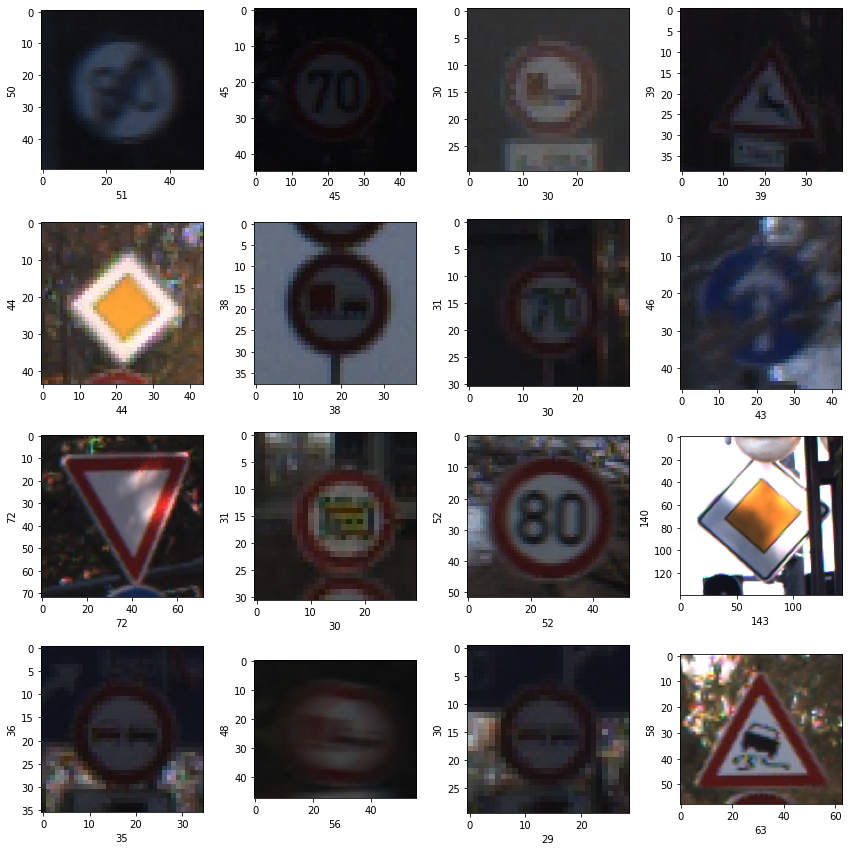

In [ ]:
# Plotting/visualizing 12 images from testdataset to check dataset, its clear that the dimensions of them are uneven right now
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) # width of the image
  plt.ylabel(rand_img.shape[0], fontsize = 10) # height of the image


In [ ]:
# As size of images are different we have to make them equal so we will take mean of dimensions
dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/'+ x)
    dim1.append(img.shape[0]) #x
    dim2.append(img.shape[1]) #y


In [ ]:
# Printing mean dimension if images
print("Dim 1 :", np.mean(dim1), "Dim 2 :", np.mean(dim2))

Dim 1 : 50.328929582493814 Dim 2 : 50.83587951745773


In [ ]:
# Now reshaping all of them to 50by50 and also storing label ids
images = []
label_id = []

for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)


In [ ]:
# converting images into numpy array
images = np.array(images)
# the pixel value of each image ranges between 0 and 255
# so diving each image value by 255 will scale the values between 0 and 1. This is called normalization
images = images/255

In [ ]:
# storing them in label_id
label_id = np.array(label_id)
label_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
# Find out the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [ ]:
# this show that the data is already balanced as they are around 2200 appt

# Now Splitting the data, 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state = 42)

In [ ]:
#one hot encoding is important for avoiding the prioritisation of the data by machine itself
# keras had built in function for one hot encoding
# Converting the classes colums into categorical using to_categorical function
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
# building the model
model = Sequential()
# this is called hyper parameter tuning (the down one line)
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
# as many layers as we want
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax')) #this layer always has total no. of neurons as total classes i.e. 43
#multiclass classification needs softmax function which gives the probability of all the classes

In [ ]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 25, 25, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 11, 11, 64)       

In [ ]:
# fit and train on epochs
model.fit(x_train, y_train, epochs =50, batch_size=128, validation_data=(x_val, y_val), verbose = 2)

Epoch 1/50
246/246 - 16s - loss: 2.5787 - accuracy: 0.3012 - val_loss: 1.2255 - val_accuracy: 0.6762 - 16s/epoch - 67ms/step
Epoch 2/50
246/246 - 5s - loss: 1.1736 - accuracy: 0.6361 - val_loss: 0.4610 - val_accuracy: 0.9021 - 5s/epoch - 19ms/step
Epoch 3/50
246/246 - 5s - loss: 0.7647 - accuracy: 0.7559 - val_loss: 0.2902 - val_accuracy: 0.9433 - 5s/epoch - 19ms/step
Epoch 4/50
246/246 - 4s - loss: 0.6152 - accuracy: 0.8020 - val_loss: 0.1890 - val_accuracy: 0.9652 - 4s/epoch - 18ms/step
Epoch 5/50
246/246 - 5s - loss: 0.5151 - accuracy: 0.8339 - val_loss: 0.1492 - val_accuracy: 0.9713 - 5s/epoch - 19ms/step
Epoch 6/50
246/246 - 5s - loss: 0.4560 - accuracy: 0.8522 - val_loss: 0.1313 - val_accuracy: 0.9750 - 5s/epoch - 19ms/step
Epoch 7/50
246/246 - 4s - loss: 0.4216 - accuracy: 0.8650 - val_loss: 0.1030 - val_accuracy: 0.9819 - 4s/epoch - 18ms/step
Epoch 8/50
246/246 - 4s - loss: 0.3806 - accuracy: 0.8769 - val_loss: 0.0904 - val_accuracy: 0.9837 - 4s/epoch - 18ms/step
Epoch 9/50
246

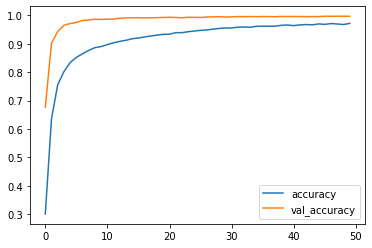

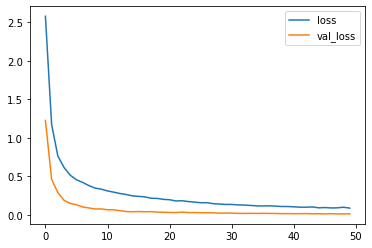

In [ ]:
# verbose = 2 shows training of the model after each epoch
# now we visualize the accuracy and loss per epoch. For it we store the model history in the pandas dataframe and plot them
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
# creating a variable having path of the test dataset. While doenloading the dataset a gt-final.csv come in which is useless so remove it
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [ ]:
# now the test images also needs to be scaled as per train images and normalization
from PIL import Image

def scaling(test_images, test_path):
  images =[]

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path+'/'+ x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

  #convert them into numpy array
  images = np.array(images)
  #the pixel value of each image ranges between 0 and 255
  #dividing each image by 255 will scale the values between 0 and 1. Normalization
  images = images/255

  return images

In [ ]:
# now using the created function on test images
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [ ]:
# now reading the label ids from Test.csv and storing the values of the class id in y_test variable
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test


array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
# now predictions on our test images and storing in y_pred
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 1s 2ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [ ]:
# storing all labels according to the image classes by taking fromt the kaggle


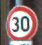

In [ ]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [ ]:
# original label
print("Original label : ", y_test[10])

Original label :  12


In [ ]:
# predicted label
print("Predicted label : ", y_pred[10])

Predicted label :  12


This One Completes Here, Great Job!